# Information Retrieval and Web Analytics
## Project Part 1



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load Python packages
Let's first import all the packages that you will need during this assignment.

In [ ]:
# if you do not have 'nltk', the following command should work "python -m pip install nltk"
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import re
import time
import json
import matplotlib.pyplot as plt
import math
import csv
import pandas as pd
import spacy
from collections import Counter
import pandas as pd
from collections import defaultdict
import re
from array import array
from sklearn.manifold import TSNE
from gensim.models.word2vec import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

#### Load data into memory
The data is stored in a Json file with 4000 different tweets with the same structure.

In [ ]:
docs_path = '/content/Rus_Ukr_war_data.json'
with open(docs_path) as fp:
    lines = fp.readlines()
lines = [l.strip().replace(' +', ' ') for l in lines]

In [ ]:
print("Total number of tweets in the json file: {}".format(len(lines)))

Total number of tweets in the json file: 4000


#### Here, we implement the text processing part, as well as extra things that will help us eventually in the data analysis.


In [ ]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

def build_terms(line):
    """
    Preprocess the article text (title + body) removing stop words, stemming,
    transforming in lowercase and return the tokens of the text.

    Argument:
    line -- string (text) to be preprocessed

    Returns:
    line - a list of tokens corresponding to the input text after the preprocessing
    """


    ## START CODE

    url_pattern = r'https?://\S+|www\.\S+'
    line = re.sub(url_pattern, '', text)

    line = line.lower()  ## Transform in lowercase
    clean_text = re.sub(r'[!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', text) #Remove punctuation marks
    line = re.sub(r'\W', ' ', line) #Remove emojis
    line = line.split() ## Tokenize the text to get a list of terms
    line = [word for word in line if word not in stop_words]  ##eliminate the stopwords (HINT: use List Comprehension)
    line = [stemmer.stem(word) for word in line] ## perform stemming (HINT: use List Comprehension)


    return line

processed_tweets = {}
counting_word  = []
dictio = []
for line in lines:
  data = json.loads(line)
  text = data["full_text"]
  processed_line = build_terms(text)

  for word in processed_line :
    if word.isalpha() and word not in dictio:
      dictio.append(word)


    word_count = len(processed_line)
    counting_word.append(word_count)

  processed_tweets[data["id"]] = {
                        "processed_text" : processed_line,
                        "created_at": data["created_at"],
                         "hashtags": [entity['text'] for entity in data["entities"]['hashtags']],
                         "retweet_count": data["retweet_count"]}

In [ ]:
#Final output
df1 = pd.DataFrame.from_dict(processed_tweets).T
df1.index.name = "Tweet_Id"
display(df1)

,processed_text,created_at,hashtags,retweet_count
Tweet_Id,,,,
1575918221013979136,"[melsimmonsfcdo, wrong, dictat, putin, fascist...",Fri Sep 30 18:39:17 0000 2022,"[RussiainvadesUkraine, UkraineRussiaWar]",0
1575918081461080065,"[arm, forc, liber, villag, drobyshev, lymansk,...",Fri Sep 30 18:38:44 0000 2022,"[Drobysheve, Lymansk, Donetsk, UkraineRussiaWa...",0
1575917992390823936,"[alert, poland, prep, anti, radiat, tablet, nu...",Fri Sep 30 18:38:23 0000 2022,"[NATO, Putin, Russia, RussiaInvadedUkraine, Uk...",0
1575917907774967809,"[still, wait, googl, map, updat, russia, new, ...",Fri Sep 30 18:38:03 0000 2022,"[Putin, UkraineRussiaWar]",0
1575917878410301441,"[emmanuelmacron, probabl, right, say, anyway, ...",Fri Sep 30 18:37:56 0000 2022,"[European, UkraineRussiaWar]",0
...,...,...,...,...
1575154617620504576,"[ukrain, presid, warn, russia, sham, referendu...",Wed Sep 28 16:05:00 0000 2022,[UkraineRussiaWar],1
1575154444165156864,"[germani, amusingli, share, day, old, intellig...",Wed Sep 28 16:04:19 0000 2022,"[germany, UkraineRussiaWar]",0
1575154440012812288,"[us, embassi, moscow, urg, american, leav, rus...",Wed Sep 28 16:04:18 0000 2022,"[fakenewsfilter, RealNews, news, RussianMobili...",0


In [ ]:
#Reading data from the second CSV file
csv_file2_path = '/content/Rus_Ukr_war_data_ids.csv'
df2 = pd.read_csv(csv_file2_path, delimiter ="\t", names =["doc", "Tweet_Id"])


merged_df = pd.merge(df1, df2, on='Tweet_Id', how='inner')  #'inner' means only include common values in 'doc'
display(merged_df)

,Tweet_Id,processed_text,created_at,hashtags,retweet_count,doc
0,1575918221013979136,"[melsimmonsfcdo, wrong, dictat, putin, fascist...",Fri Sep 30 18:39:17 0000 2022,"[RussiainvadesUkraine, UkraineRussiaWar]",0,doc_1
1,1575918081461080065,"[arm, forc, liber, villag, drobyshev, lymansk,...",Fri Sep 30 18:38:44 0000 2022,"[Drobysheve, Lymansk, Donetsk, UkraineRussiaWa...",0,doc_2
2,1575917992390823936,"[alert, poland, prep, anti, radiat, tablet, nu...",Fri Sep 30 18:38:23 0000 2022,"[NATO, Putin, Russia, RussiaInvadedUkraine, Uk...",0,doc_3
3,1575917907774967809,"[still, wait, googl, map, updat, russia, new, ...",Fri Sep 30 18:38:03 0000 2022,"[Putin, UkraineRussiaWar]",0,doc_4
4,1575917878410301441,"[emmanuelmacron, probabl, right, say, anyway, ...",Fri Sep 30 18:37:56 0000 2022,"[European, UkraineRussiaWar]",0,doc_5
...,...,...,...,...,...,...
3995,1575154617620504576,"[ukrain, presid, warn, russia, sham, referendu...",Wed Sep 28 16:05:00 0000 2022,[UkraineRussiaWar],1,doc_3996
3996,1575154444165156864,"[germani, amusingli, share, day, old, intellig...",Wed Sep 28 16:04:19 0000 2022,"[germany, UkraineRussiaWar]",0,doc_3997
3997,1575154440012812288,"[us, embassi, moscow, urg, american, leav, rus...",Wed Sep 28 16:04:18 0000 2022,"[fakenewsfilter, RealNews, news, RussianMobili...",0,doc_3998
3998,1575154351273873410,"[stage, fake, referendum, septemb, 2022, russi...",Wed Sep 28 16:03:56 0000 2022,[UkraineRussiaWar],2,doc_3999


In [ ]:
text_processed = merged_df['processed_text'].tolist()

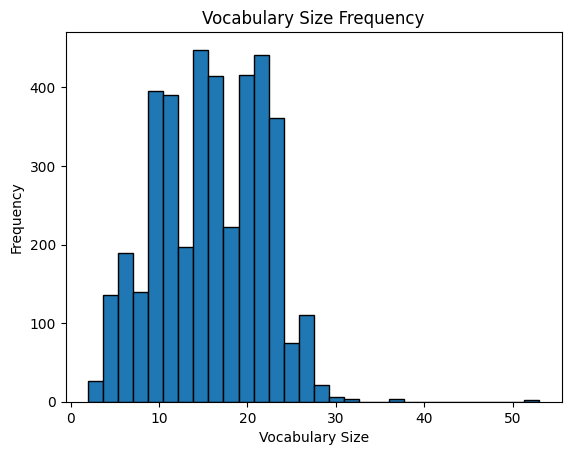

In [ ]:
#Making the distribution of the length of the different words
def calculate_vocabulary_size(processed_text):
    words = processed_text
    vocabulary_size = len(set(word for word in words if word.isalpha()))
    return vocabulary_size

vocabulary_sizes = []
for tweet_id, tweet_data in processed_tweets.items():
      processed_text = tweet_data["processed_text"]
      vocab_size = calculate_vocabulary_size(processed_text)
      vocabulary_sizes.append(vocab_size)

plt.hist(vocabulary_sizes, bins=30, edgecolor='black')

plt.xlabel('Vocabulary Size')
plt.ylabel('Frequency')
plt.title('Vocabulary Size Frequency')

plt.show()

In [ ]:
print(sorted(dictio))
len(dictio)

['aagalloni', 'aarp', 'ab', 'abaerbock', 'abandon', 'abc', 'abcnew', 'abcz', 'abduct', 'abhiuditkoush', 'abil', 'abl', 'abortionright', 'abou', 'abound', 'abram', 'abrezet', 'abroad', 'absolut', 'absorb', 'absorpt', 'absorv', 'absurd', 'abus', 'abysm', 'abzay', 'academ', 'academicloung', 'acc', 'acceler', 'accept', 'access', 'accid', 'accommod', 'accompani', 'accord', 'accordingli', 'account', 'accur', 'accuraci', 'accus', 'accustom', 'achiev', 'acknowledg', 'acquir', 'across', 'acsv', 'act', 'action', 'activ', 'actor', 'actress', 'actual', 'acuiti', 'ad', 'ada', 'adamkinzing', 'adapt', 'add', 'addit', 'address', 'adequ', 'adhes', 'admin', 'administ', 'administr', 'admir', 'admiss', 'admit', 'adolf', 'adolfputin', 'adopt', 'adult', 'advanc', 'advantag', 'adversari', 'advertis', 'advic', 'advis', 'advisor', 'advisori', 'advoc', 'aegean', 'aerial', 'aeronautica', 'aerospac', 'aerospaci', 'aew', 'af', 'afb', 'affair', 'affect', 'afford', 'afganistan', 'afghan', 'afghanistan', 'afp', 'afra

7268

In [ ]:
retweet_counts = {tweet_id: int(tweet_data["retweet_count"]) for tweet_id, tweet_data in processed_tweets.items()}

#Sorting the processed_tweets by retweet counts in descending order
sorted_tweets = sorted(processed_tweets.items(), key=lambda x: retweet_counts.get(x[0], 0), reverse=True)

#Selecting the top 5 most retweeted tweets
N = 5
most_retweeted_tweets = sorted_tweets[:N]

print("Top 5 Most Retweeted Tweets:")
for index, (tweet_id, tweet_data) in enumerate(most_retweeted_tweets, start=1):
    print(f"{index}. Tweet ID: {tweet_id}, Retweets: {retweet_counts.get(tweet_id, 0)}, Text: {tweet_data['processed_text']}")

Top 5 Most Retweeted Tweets:
1. Tweet ID: 1575775162674212865, Retweets: 646, Text: ['situat', 'around', 'lyman', 'sep', '30', '11', '00', 'ua', 'forc', 'liber', 'yampil', 'advanc', 'north', 'ru', 'troop', 'reportedli', 'abandon', 'posit', 'drobyshev', 'exit', 'rout', 'lyman', 'within', 'fire', 'rang', 'ua', 'forc', 'ukrainerussiawar']
2. Tweet ID: 1575396903252025351, Retweets: 338, Text: ['uniqu', 'rare', 'photo', 'ukrainian', 'forward', 'command', 'post', 'offens', 'kharkiv', 'oblast', 'news', 'report', 'usual', 'invit', 'place', 'seem', 'except', 'ukrainerussiawar']
3. Tweet ID: 1575181552170201088, Retweets: 283, Text: ['oper', 'interflex', 'ukrainian', 'recruit', 'continu', 'master', 'skill', 'guidanc', 'british', 'canadian', 'instructor', 'uk', 'ukrainerussiawar']
4. Tweet ID: 1575625313446289409, Retweets: 251, Text: ['follow', 'countri', 'urg', 'citizen', 'leav', 'updat', 'govern', 'make', 'similar', 'statement', 'ukrainerussiawar', 'annexationofukrain', 'nafo', 'poland', 'est

#### Histogram for Data Analysis of the Words Distribution

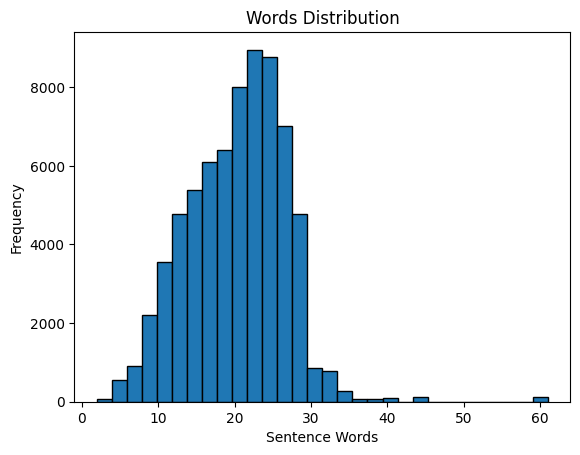

In [ ]:
plt.hist(counting_word, bins=30, edgecolor='black')

plt.xlabel('Sentence Words')
plt.ylabel('Frequency')
plt.title('Words Distribution')

plt.show()

In [ ]:
words_mean = math.ceil(sum(counting_word) / len(counting_word))

print("Average of filtered words per tweet in the Json file: ", words_mean)

Average of filtered words per tweet in the Json file:  21


# Information Retrieval and Web Analytics
## Project Part 2


#### We first set the structure of the tweets as:
- Tweet_id | Document_id | Processed_Text

In [ ]:
t_lines = []
for index, row in merged_df.iterrows():
    article_id = row['doc']
    tweet_id = row['Tweet_Id']
    tweet_text = row['processed_text']
    tweet_text =" ".join(tweet_text)

    line = f"{tweet_id}|{article_id}|{tweet_text}"
    t_lines.append(line)
print(t_lines)

['1575918221013979136|doc_1|melsimmonsfcdo wrong dictat putin fascist russia intend conquer much ukrainian land possibl russiainvadesukrain ukrainerussiawar', '1575918081461080065|doc_2|arm forc liber villag drobyshev lymansk urban territori commun donetsk region ukrainerussiawar ukrainewar ukrain ukrainewillwin ukrainianarmi ukrainecounteroffens ukrainewarnew slavaukraïni standwithukrain', '1575917992390823936|doc_3|alert poland prep anti radiat tablet nuclear threat nato putin russia russiainvadedukrain ukrain ukrainerussiawar', '1575917907774967809|doc_4|still wait googl map updat russia new annex territori take bit longer thought putin ukrainerussiawar', '1575917878410301441|doc_5|emmanuelmacron probabl right say anyway game european citizen tire pay endless ukrainerussiawar', '1575917759707299841|doc_6|estonia lithuania latvia fulli support welcom ukrain nato soon possibl lithuania minist foreign affair say russia russiainvadedukrain ukrain ukrainerussiawar', '1575917751360593920|

### Applying the inverted index creation

In [ ]:
def create_index(t_lines):
    """
    Implement the inverted index

    Argument:
    lines -- collection of tweets

    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of documents where these keys appears in (and the positions) as values.
    """
    index = defaultdict(list)
    title_index = {}  # dictionary to map page titles to page ids
    for line in t_lines:  # Remember, lines contain all documents:
        line_arr = line.split("|")
        doc_id = line_arr[0]
        tweet_text = ''.join((line_arr[2]))
       # tweet_text = "".join(line[1:])  # Assuming the tweet text is at index 2 in line_arr
        # Store tweet text in title_index dictionary
        title = line_arr[1]
        title_index[doc_id] = title

        # Tokenize the tweet text into terms
        ## ===============================================================
        ## create the index for the current page and store it in current_page_index (current_page_index)
        ## current_page_index ==> { ‘term1’: [current_doc, [list of positions]], ...,‘term_n’: [current_doc, [list of positions]]}

        ## Example: if the curr_doc has id 1 and his text is
        ##"web retrieval information retrieval":

        ## current_page_index ==> { ‘web’: [1, [0]], ‘retrieval’: [1, [1,3]], ‘information’: [1, [2]]}
        current_page_index = {}
        tweet_text_1 = tweet_text.split()
        for position, term in enumerate(tweet_text_1): # terms contains page_title + page_text. Loop over all terms

            try:
                # if the term is already in the index for the current page (current_page_index)
                # append the position to the corresponding list

        ## START CODE
                current_page_index[term][1].append(position)
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                current_page_index[term]=[doc_id, array('I',[position])] #'I' indicates unsigned int (int in Python)

        #merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            index[term_page].append(posting_page)

        ## END CODE

    return index, title_index

In [ ]:
index, title_index = create_index(t_lines)

In [ ]:
def build_terms(text):
    text = text.lower()
    terms = re.findall(r'\b\w+\b', text)
    return terms

def search(query, index):
    """
    The output is the list of documents that contain any of the query terms.
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = build_terms(query)
    docs = set()
    for term in query:
    ## START DODE
        try:
            # store in term_docs the ids of the docs that contain "term"
            term_docs=[posting[0] for posting in index[term]]
            # docs = docs Union term_docs
            docs = docs.union(set(term_docs))
        except:
            #term is not in index
            pass
    documents = list(docs)
    return documents

### Testing different queries:

In [ ]:
query = 'presidents visiting kyiv'
docs = search(query, index)
top = 10
ground = {}

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(docs)))
for d_id in docs[:top]:
    print("Document_id: {} - Tweet_id: {}".format(title_index[d_id], d_id))


Top 10 results out of 123 for the searched query:

Document_id: doc_2912 - Tweet_id: 1575368771736215552
Document_id: doc_2123 - Tweet_id: 1575557427118088192
Document_id: doc_456 - Tweet_id: 1575854630592217088
Document_id: doc_265 - Tweet_id: 1575888980393984001
Document_id: doc_488 - Tweet_id: 1575850164090126336
Document_id: doc_2942 - Tweet_id: 1575362738167377921
Document_id: doc_3751 - Tweet_id: 1575183278445039616
Document_id: doc_13 - Tweet_id: 1575916461620690977
Document_id: doc_3229 - Tweet_id: 1575266793467564032
Document_id: doc_2489 - Tweet_id: 1575469260859707393


In [ ]:
query = 'moscow has surpassed limits'
docs2 = search(query, index)
top = 10

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(docs2)))
for d_id in docs2[:top]:
    print("Document_id: {} - Tweet_id: {}".format(title_index[d_id], d_id))


Top 10 results out of 87 for the searched query:

Document_id: doc_261 - Tweet_id: 1575889211882102785
Document_id: doc_3065 - Tweet_id: 1575325823875387397
Document_id: doc_3996 - Tweet_id: 1575154617620504576
Document_id: doc_3083 - Tweet_id: 1575316392286556161
Document_id: doc_265 - Tweet_id: 1575888980393984001
Document_id: doc_826 - Tweet_id: 1575817819287003136
Document_id: doc_418 - Tweet_id: 1575860393284509696
Document_id: doc_1668 - Tweet_id: 1575648737174511616
Document_id: doc_1865 - Tweet_id: 1575622413085470720
Document_id: doc_3998 - Tweet_id: 1575154440012812288


In [ ]:
query = 'putin'
docs3 = search(query, index)
top = 10

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(docs3)))
for d_id in docs3[:top]:
    print("Document_id: {} - Tweet_id: {}".format(title_index[d_id], d_id))


Top 10 results out of 916 for the searched query:

Document_id: doc_2471 - Tweet_id: 1575472752680648707
Document_id: doc_3557 - Tweet_id: 1575204428457517056
Document_id: doc_395 - Tweet_id: 1575865025818144768
Document_id: doc_2602 - Tweet_id: 1575457315557457923
Document_id: doc_163 - Tweet_id: 1575900645965430784
Document_id: doc_2486 - Tweet_id: 1575470059253891072
Document_id: doc_2899 - Tweet_id: 1575371806575321088
Document_id: doc_1683 - Tweet_id: 1575647322746523648
Document_id: doc_3972 - Tweet_id: 1575157220068667392
Document_id: doc_171 - Tweet_id: 1575900136349503488


In [ ]:
query = 'stop war'
docs4 = search(query, index)
top = 10

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(docs4)))
for d_id in docs4[:top]:
    print("Document_id: {} - Tweet_id: {}".format(title_index[d_id], d_id))


Top 10 results out of 571 for the searched query:

Document_id: doc_2684 - Tweet_id: 1575438884498034688
Document_id: doc_1683 - Tweet_id: 1575647322746523648
Document_id: doc_3732 - Tweet_id: 1575185142775427072
Document_id: doc_1447 - Tweet_id: 1575710849360343040
Document_id: doc_998 - Tweet_id: 1575802830975569921
Document_id: doc_3827 - Tweet_id: 1575176112132718593
Document_id: doc_1304 - Tweet_id: 1575758940633063424
Document_id: doc_2693 - Tweet_id: 1575437653092499456
Document_id: doc_3910 - Tweet_id: 1575164112237395968
Document_id: doc_1409 - Tweet_id: 1575731632925020160


In [ ]:
query = 'war crimes of russia'
docs5 = search(query, index)
top = 10

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(docs5)))
for d_id in docs5[:top]:
    print("Document_id: {} - Tweet_id: {}".format(title_index[d_id], d_id))


Top 10 results out of 1854 for the searched query:

Document_id: doc_2471 - Tweet_id: 1575472752680648707
Document_id: doc_2789 - Tweet_id: 1575404889202737152
Document_id: doc_2602 - Tweet_id: 1575457315557457923
Document_id: doc_1832 - Tweet_id: 1575628451054518272
Document_id: doc_2521 - Tweet_id: 1575465452922458112
Document_id: doc_2517 - Tweet_id: 1575465545817792513
Document_id: doc_2113 - Tweet_id: 1575560694313160704
Document_id: doc_951 - Tweet_id: 1575808115726958594
Document_id: doc_2693 - Tweet_id: 1575437653092499456
Document_id: doc_1037 - Tweet_id: 1575799115878834177


In [ ]:
i = 0
for d_id in docs[:top]:
    if i < 10:
      ground[i] = {'doc': title_index[d_id], 'query_id': 'Q1', 'label': 1}
      i += 1

i = 10
for index, row in merged_df.iterrows():
    if i < 20:
      if row['Tweet_Id'] not in docs:
        ground[i] = {'doc': row['doc'], 'query_id': 'Q1', 'label': 0}
        i += 1

In [ ]:
i = 20
for d_id in docs2[:top]:
    if i < 30:
      ground[i] = {'doc': title_index[d_id], 'query_id': 'Q2', 'label': 1}
      i += 1

i = 30
for index, row in merged_df.iloc[300:].iterrows():
    if i < 40:
      if row['Tweet_Id'] not in docs2:
        ground[i] = {'doc': row['doc'], 'query_id': 'Q2', 'label': 0}
        i += 1

In [ ]:
i = 40
for d_id in docs3[:top]:
    if i < 50:
      ground[i] = {'doc': title_index[d_id], 'query_id': 'Q3', 'label': 1}
      i += 1

i = 50
for index, row in merged_df.iterrows():
    if i < 60:
      if row['Tweet_Id'] not in docs3:
        ground[i] = {'doc': row['doc'], 'query_id': 'Q3', 'label': 0}
        i += 1

In [ ]:
i = 60
for d_id in docs4[:top]:
    if i < 70:
      ground[i] = {'doc': title_index[d_id], 'query_id': 'Q4', 'label': 1}
      i += 1

i = 70
for index, row in merged_df.iterrows():
    if i < 80:
      if row['Tweet_Id'] not in docs4:
        ground[i] = {'doc': row['doc'], 'query_id': 'Q4', 'label': 0}
        i += 1

In [ ]:
i = 80
for d_id in docs5[:top]:
    if i < 90:
      ground[i] = {'doc': title_index[d_id], 'query_id': 'Q5', 'label': 1}
      i += 1

i = 90
for index, row in merged_df.iloc[700:].iterrows():
    if i < 100:
      if row['Tweet_Id'] not in docs5:
        ground[i] = {'doc': row['doc'], 'query_id': 'Q5', 'label': 0}
        i += 1

### Implementing TF-IDF Ranking Method

In [ ]:
def create_index_tfidf(lines, num_documents):
    """
    Implement the inverted index and compute tf, df and idf

    Argument:
    t_lines
    num_documents -- total number of documents

    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of document these keys appears in (and the positions) as values.
    tf - normalized term frequency for each term in each document
    df - number of documents each term appear in
    idf - inverse document frequency of each term
    """

    index = defaultdict(list)
    tf = defaultdict(list)  # term frequencies of terms in documents (documents in the same order as in the main index)
    df = defaultdict(int)  # document frequencies of terms in the corpus
    title_index = defaultdict(str)
    idf = defaultdict(float)

    for line in lines:
        line_arr = line.split("|")
        tweet_id = line_arr[0]
        terms = build_terms(''.join(line_arr[1:]))  # page_title + page_text
        title = line_arr[1]
        title_index[tweet_id] = title


        ## ===============================================================
        ## create the index for the **current page** and store it in current_page_index
        ## current_page_index ==> { ‘term1’: [current_doc, [list of positions]], ...,‘term_n’: [current_doc, [list of positions]]}

        ## Example: if the curr_doc has id 1 and his text is
        ##"web retrieval information retrieval":

        ## current_page_index ==> { ‘web’: [1, [0]], ‘retrieval’: [1, [1,4]], ‘information’: [1, [2]]}

        ## the term ‘web’ appears in document 1 in positions 0,
        ## the term ‘retrieval’ appears in document 1 in positions 1 and 4
        ## ===============================================================

        current_page_index = {}

        for position, term in enumerate(terms):  ## terms contains page_title + page_text
            try:
                # if the term is already in the dict append the position to the corresponding list
                current_page_index[term][1].append(position)
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                current_page_index[term]=[tweet_id, array('I',[position])] #'I' indicates unsigned int (int in Python)

        #normalize term frequencies
        # Compute the denominator to normalize term frequencies (formula 2 above)
        # norm is the same for all terms of a document.
        norm = 0
        for term, posting in current_page_index.items():
            # posting will contain the list of positions for current term in current document.
            # posting ==> [current_doc, [list of positions]]
            # you can use it to infer the frequency of current term.
            norm += len(posting[1]) ** 2
        norm = math.sqrt(norm)

        # calculate the tf(dividing the term frequency by the above computed norm) and df weights
        for term, posting in current_page_index.items():
            # append the tf for current term (tf = term frequency in current doc/norm)
            tf[term].append(np.round(len(posting[1])/norm,4)) ## SEE formula (1) above
            #increment the document frequency of current term (number of documents containing the current term)
            df[term] += 1  # increment DF for current term

        #merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            index[term_page].append(posting_page)

        # Compute IDF following the formula (3) above. HINT: use np.log
        for term in df:
            idf[term] = np.round(np.log(float(num_documents/df[term])), 4)

    return index, tf, df, idf, title_index


In [ ]:
num_documents = len(t_lines)
index, tf, df, idf, title_index = create_index_tfidf(t_lines, num_documents)

In [ ]:
def rank_documents(terms, docs, index, idf, tf, title_index):
    """
    Perform the ranking of the results of a search based on the tf-idf weights

    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    title_index -- mapping between page id and page title

    Returns:
    Print the list of ranked documents
    """

    # I'm interested only on the element of the docVector corresponding to the query terms
    # The remaining elements would became 0 when multiplied to the query_vector
    doc_vectors = defaultdict(lambda: [0] * len(terms)) # I call doc_vectors[k] for a nonexistent key k, the key-value pair (k,[0]*len(terms)) will be automatically added to the dictionary
    query_vector = [0] * len(terms)

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms)  # get the frequency of each term in the query.
    # Example: collections.Counter(["hello","hello","world"]) --> Counter({'hello': 2, 'world': 1})
    # HINT: use when computing tf for query_vector

    query_norm = la.norm(list(query_terms_count.values()))

    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query
        if term not in index:
            continue

        ## Compute tf*idf(normalize TF as done with documents)
        query_vector[termIndex]=(query_terms_count[term]/query_norm) * idf[term]

        # Generate doc_vectors for matching docs
        for doc_index, (doc, postings) in enumerate(index[term]):
            # Example of [doc_index, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # 1 (33, array('I', [26, 33, 57, 71, 87, 104, 109]))
            # term is in doc 26 in positions 1,4, .....
            # term is in doc 33 in positions 26,33, .....

            #tf[term][0] will contain the tf of the term "term" in the doc 26
            if doc in docs:
                doc_vectors[doc][termIndex] = tf[term][doc_index] * idf[term]  # TODO: check if multiply for idf

    # Calculate the score of each doc
    # compute the cosine similarity between queyVector and each docVector:
    # HINT: you can use the dot product because in case of normalized vectors it corresponds to the cosine similarity
    # see np.dot

    doc_scores=[[np.dot(curDocVec, query_vector), doc] for doc, curDocVec in doc_vectors.items() ]
    doc_scores.sort(reverse=True)
    result_docs = [x[1] for x in doc_scores]
    result_scores = [x[0] for x in doc_scores]
    #print document titles instead if document id's
    #result_docs=[ title_index[x] for x in result_docs ]
    if len(result_docs) == 0:
        print("No results found, try again")
        query = input()
        docs = search_tf_idf(query, index)
    #print ('\n'.join(result_docs), '\n')
    return result_docs, result_scores

In [ ]:
def search_tf_idf(query, index):
    """
    output is the list of documents that contain any of the query terms.
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = build_terms(query)
    docs = set()
    for term in query:
        try:
            # store in term_docs the ids of the docs that contain "term"
            term_docs=[ posting[0] for posting in index[term]]

            # docs = docs Union term_docs
            docs = docs.union(set(term_docs))
        except:
            #term is not in index
            pass
    docs = list(docs)
    ranked_docs, ranked_scores = rank_documents(query, docs, index, idf, tf, title_index)
    return ranked_docs, ranked_scores

### Evaluation for the previous 5 queries from indexing


In [ ]:
query = 'presidents visiting kyiv'
ranked_docs4, ranked_4 = search_tf_idf(query, index)
top = 10
data4 = {}

print("Using TF-IDF Ranking Mechanism\n")
print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs4)))
i = 0
for d_id in ranked_docs4:
    data4[i] = {'page_id': d_id, 'doc_id': title_index[d_id], 'predicted_relevance': ranked_4[i]}
    i += 1

for d_id in ranked_docs4[:top]:
    print("page_id: {} - page_title: {}".format(d_id, title_index[d_id]))

Using TF-IDF Ranking Mechanism


Top 10 results out of 122 for the searched query:

page_id: 1575768808337412098 - page_title: doc_1243
page_id: 1575241438773878784 - page_title: doc_3362
page_id: 1575527497193738240 - page_title: doc_2244
page_id: 1575888980393984001 - page_title: doc_265
page_id: 1575198410378215424 - page_title: doc_3608
page_id: 1575904096892207127 - page_title: doc_141
page_id: 1575700947401027586 - page_title: doc_1481
page_id: 1575536919466971137 - page_title: doc_2202
page_id: 1575379759378350082 - page_title: doc_2856
page_id: 1575786982168416256 - page_title: doc_1168


In [ ]:
query = 'moscow has surpassed limits'
ranked_docs5, ranked_5 = search_tf_idf(query, index)
top = 10
data5 = {}

print("Using TF-IDF Ranking Mechanism\n")
print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs5)))
i = 0
for d_id in ranked_docs5:
    data5[i] = {'page_id': d_id, 'doc_id': title_index[d_id], 'predicted_relevance': ranked_5[i]}
    i += 1

for d_id in ranked_docs5[:top]:
    print("page_id: {} - page_title: {}".format(d_id, title_index[d_id]))

Using TF-IDF Ranking Mechanism


Top 10 results out of 81 for the searched query:

page_id: 1575819500431081472 - page_title: doc_797
page_id: 1575211992797040640 - page_title: doc_3501
page_id: 1575361937457692673 - page_title: doc_2947
page_id: 1575636224630730752 - page_title: doc_1777
page_id: 1575825093996912640 - page_title: doc_694
page_id: 1575190095233429505 - page_title: doc_3683
page_id: 1575825223752257537 - page_title: doc_691
page_id: 1575917670049857538 - page_title: doc_9
page_id: 1575874933674356737 - page_title: doc_339
page_id: 1575527497193738240 - page_title: doc_2244


In [ ]:
query = 'putin'
ranked_docs6, ranked_6 = search_tf_idf(query, index)
top = 10
data6 = {}

print("Using TF-IDF Ranking Mechanism\n")
print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs6)))
i = 0
for d_id in ranked_docs6:
    data6[i] = {'page_id': d_id, 'doc_id': title_index[d_id], 'predicted_relevance': ranked_6[i]}
    i += 1

for d_id in ranked_docs6[:top]:
    print("page_id: {} - page_title: {}".format(d_id, title_index[d_id]))

Using TF-IDF Ranking Mechanism


Top 10 results out of 814 for the searched query:

page_id: 1575797057650331649 - page_title: doc_1071
page_id: 1575821645830307840 - page_title: doc_766
page_id: 1575641970021539840 - page_title: doc_1736
page_id: 1575457554062262273 - page_title: doc_2594
page_id: 1575665489337991168 - page_title: doc_1615
page_id: 1575828107721834498 - page_title: doc_644
page_id: 1575342731605381120 - page_title: doc_3018
page_id: 1575898186673442818 - page_title: doc_197
page_id: 1575827125159940096 - page_title: doc_654
page_id: 1575334039246065664 - page_title: doc_3047


In [ ]:
query = 'stop war'
ranked_docs7, ranked_7 = search_tf_idf(query, index)
top = 10
data7 = {}

print("Using TF-IDF Ranking Mechanism\n")
print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs7)))
i = 0
for d_id in ranked_docs7:
    data7[i] = {'page_id': d_id, 'doc_id': title_index[d_id], 'predicted_relevance': ranked_7[i]}
    i += 1

for d_id in ranked_docs7[:top]:
    print("page_id: {} - page_title: {}".format(d_id, title_index[d_id]))

Using TF-IDF Ranking Mechanism


Top 10 results out of 527 for the searched query:

page_id: 1575548179218472960 - page_title: doc_2157
page_id: 1575751722017779713 - page_title: doc_1344
page_id: 1575569862855823362 - page_title: doc_2091
page_id: 1575160466980352000 - page_title: doc_3941
page_id: 1575462082321207296 - page_title: doc_2546
page_id: 1575806511317913600 - page_title: doc_964
page_id: 1575688594530115586 - page_title: doc_1528
page_id: 1575248094161051648 - page_title: doc_3303
page_id: 1575288433714536455 - page_title: doc_3173
page_id: 1575258595721191428 - page_title: doc_3251


In [ ]:
query = 'war crimes of russia'
ranked_docs8, ranked_8 = search_tf_idf(query, index)
top = 10
data8 = {}

print("Using TF-IDF Ranking Mechanism\n")
print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs8)))
i = 0
for d_id in ranked_docs8:
    data8[i] = {'page_id': d_id, 'doc_id': title_index[d_id], 'predicted_relevance': ranked_8[i]}
    i += 1

for d_id in ranked_docs8[:top]:
    print("page_id: {} - page_title: {}".format(d_id, title_index[d_id]))

Using TF-IDF Ranking Mechanism


Top 10 results out of 1699 for the searched query:

page_id: 1575810627448475651 - page_title: doc_925
page_id: 1575791991522140162 - page_title: doc_1117
page_id: 1575242098197995520 - page_title: doc_3356
page_id: 1575189180543475712 - page_title: doc_3693
page_id: 1575825041731641346 - page_title: doc_696
page_id: 1575388235836149761 - page_title: doc_2834
page_id: 1575897041385181184 - page_title: doc_204
page_id: 1575162024140877824 - page_title: doc_3928
page_id: 1575743364573450240 - page_title: doc_1384
page_id: 1575410236453789696 - page_title: doc_2766


In [ ]:
query = 'tanks in kharkiv'
ranked_docs1, ranked_1 = search_tf_idf(query, index)
top = 10
data1 = {}

print("Using TF-IDF Ranking Mechanism\n")
print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs1)))
i = 0
for d_id in ranked_docs1:
    data1[i] = {'page_id': d_id, 'doc_id': title_index[d_id], 'predicted_relevance': ranked_1[i]}
    i += 1

for d_id in ranked_docs1[:top]:
    print("page_id: {} - page_title: {}".format(d_id, title_index[d_id]))

Using TF-IDF Ranking Mechanism


Top 10 results out of 328 for the searched query:

page_id: 1575528927245770752 - page_title: doc_2234
page_id: 1575532112756850690 - page_title: doc_2223
page_id: 1575448045457707009 - page_title: doc_2656
page_id: 1575759898331447297 - page_title: doc_1297
page_id: 1575911882040709120 - page_title: doc_51
page_id: 1575304029810425856 - page_title: doc_3126
page_id: 1575869302104027136 - page_title: doc_363
page_id: 1575244063305043992 - page_title: doc_3335
page_id: 1575610720322211840 - page_title: doc_1928
page_id: 1575239729196388352 - page_title: doc_3375


In [ ]:
query = 'Nord Stream pipeline'
ranked_docs2, ranked_2 = search_tf_idf(query, index)
top = 10
data2 = {}
print("Using TF-IDF Ranking Mechanism\n")
print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs2)))
i = 0
for d_id in ranked_docs2:
    data2[i] = {'page_id': d_id, 'doc_id': title_index[d_id], 'predicted_relevance': ranked_2[i]}
    i += 1

for d_id in ranked_docs2[:top]:
    print("page_id: {} - page_title: {}".format(d_id, title_index[d_id]))

Using TF-IDF Ranking Mechanism


Top 10 results out of 46 for the searched query:

page_id: 1575369493957595136 - page_title: doc_2908
page_id: 1575709956699045888 - page_title: doc_1452
page_id: 1575830204739731456 - page_title: doc_623
page_id: 1575314440504893442 - page_title: doc_3093
page_id: 1575830353885163520 - page_title: doc_618
page_id: 1575533133901930496 - page_title: doc_2217
page_id: 1575564697977298945 - page_title: doc_2101
page_id: 1575441520232173575 - page_title: doc_2677
page_id: 1575243045775474688 - page_title: doc_3344
page_id: 1575228605088468992 - page_title: doc_3439


In [ ]:
query = 'annexation of territories by Russia'
ranked_docs3, ranked_3 = search_tf_idf(query, index)
top = 10
data3 = {}
print("Using TF-IDF Ranking Mechanism\n")
print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs3)))
i = 0
for d_id in ranked_docs3:
    data3[i] = {'page_id': d_id, 'doc_id': title_index[d_id], 'predicted_relevance': ranked_3[i]}
    i += 1

for d_id in ranked_docs3[:top]:
    print("page_id: {} - page_title: {}".format(d_id, title_index[d_id]))

Using TF-IDF Ranking Mechanism


Top 10 results out of 1437 for the searched query:

page_id: 1575884086547095557 - page_title: doc_295
page_id: 1575837750321811456 - page_title: doc_568
page_id: 1575917670049857538 - page_title: doc_9
page_id: 1575904096892207127 - page_title: doc_141
page_id: 1575830084082360320 - page_title: doc_624
page_id: 1575823885098156032 - page_title: doc_720
page_id: 1575820535619280897 - page_title: doc_784
page_id: 1575793738579845124 - page_title: doc_1100
page_id: 1575496810134917128 - page_title: doc_2370
page_id: 1575163255693070339 - page_title: doc_3919


## Evaluation with Rank-Based Metrics


    

### 1 - Load data into memory

In [ ]:
ground = pd.DataFrame.from_dict(ground).T
ground = ground.rename(columns={'doc': 'doc_id'})

In [ ]:
search_results = pd.read_csv("/content/Evaluation_gt.csv")
search_results = search_results.rename(columns={'doc': 'doc_id'})

In [ ]:
data1 = pd.DataFrame(data1).transpose()
data2 = pd.DataFrame(data2).transpose()
data3 = pd.DataFrame(data3).transpose()
data4 = pd.DataFrame(data4).transpose()
data5 = pd.DataFrame(data5).transpose()
data6 = pd.DataFrame(data6).transpose()
data7 = pd.DataFrame(data7).transpose()
data8 = pd.DataFrame(data8).transpose()

In [ ]:
query_1 = search_results[search_results['query_id'] == 'Q1']
query_2 = search_results[search_results['query_id'] == 'Q2']
query_3 = search_results[search_results['query_id'] == 'Q3']

query_1_0 = query_1[query_1['label'] == 0]
query_2_0 = query_2[query_2['label'] == 0]
query_3_0 = query_3[query_3['label'] == 0]

query_1 = pd.concat([query_1, query_2_0, query_3_0])
query_2 = pd.concat([query_2, query_1_0, query_3_0])
query_3 = pd.concat([query_3, query_1_0, query_2_0])


indexing1 = ground[ground['query_id'] == 'Q1']
indexing2 = ground[ground['query_id'] == 'Q2']
indexing3 = ground[ground['query_id'] == 'Q3']
indexing4 = ground[ground['query_id'] == 'Q4']
indexing5 = ground[ground['query_id'] == 'Q5']

index_1_0 = indexing1[indexing1['label'] == 0]
index_2_0 = indexing2[indexing2['label'] == 0]
index_3_0 = indexing3[indexing3['label'] == 0]
index_4_0 = indexing4[indexing4['label'] == 0]
index_5_0 = indexing5[indexing5['label'] == 0]

indexing1 = pd.concat([indexing1, index_2_0, index_3_0, index_4_0, index_5_0])
indexing2 = pd.concat([indexing2, index_3_0, index_4_0, index_5_0, index_1_0])
indexing3 = pd.concat([indexing3, index_4_0, index_5_0, index_1_0, index_2_0])
indexing4 = pd.concat([indexing4, index_5_0, index_1_0, index_2_0, index_3_0])
indexing5 = pd.concat([indexing5, index_1_0, index_2_0, index_3_0, index_4_0])

In [ ]:
query_1 = query_1.merge(data1, on='doc_id', how='left')
query_1 = query_1.fillna(0)

In [ ]:
query_2 = query_2.merge(data2, on='doc_id', how='left')
query_2 = query_2.fillna(0)

In [ ]:
query_3 = query_3.merge(data3, on='doc_id', how='left')
query_3 = query_3.fillna(0)

#### Loading ground truth for our queries

In [ ]:
indexing1 = indexing1.merge(data4, on='doc_id', how='left')
indexing1 = indexing1.fillna(0)

In [ ]:
indexing2 = indexing2.merge(data5, on='doc_id', how='left')
indexing2 = indexing2.fillna(0)

In [ ]:
indexing3 = indexing3.merge(data6, on='doc_id', how='left')
indexing3 = indexing3.fillna(0)

In [ ]:
indexing4 = indexing4.merge(data7, on='doc_id', how='left')
indexing4 = indexing4.fillna(0)

In [ ]:
indexing5 = indexing5.merge(data8, on='doc_id', how='left')
indexing5 = indexing5.fillna(0)

### 2 - Metrics for Ranking



#### Precision @ K (P@K)

Precision at K **(P@K) measures the number of relevant results among the top K documents**. It assesses whether the users are getting relevant documents at the top of the ranking or not.



In [ ]:
def precision_at_k(doc_score, y_score, k=10):
    """
    Parameters
    ----------
    doc_score: Ground truth (true relevance labels).
    y_score: Predicted scores.
    k : number of doc to consider.

    Returns
    -------
    precision @k : float

    """
    order = np.argsort(y_score)[::-1]
    doc_score = np.take(doc_score, order[:k])
    relevant = sum(doc_score == 1)
    return float(relevant) / k

For our indexing queries:

In [ ]:
k = 10

print("\n=====================")
print("Query_1")
print("=====================\n")

print("==> Precision@{}: {}\n".format(k, precision_at_k(indexing1["label"], indexing1["predicted_relevance"], k)))
print("\nCheck on the dataset sorted by score:\n")
#current_query_res.sort_values("score", ascending=False).head(k)
display(indexing1.sort_values("predicted_relevance", ascending=False).head(k))

print("\n=====================")
print("Query_2")
print("=====================\n")

print("==> Precision@{}: {}\n".format(k, precision_at_k(indexing2["label"], indexing2["predicted_relevance"], k)))
print("\nCheck on the dataset sorted by score:\n")
#current_query_res.sort_values("score", ascending=False).head(k)
display(indexing2.sort_values("predicted_relevance", ascending=False).head(k))

print("\n=====================")
print("Query_3")
print("=====================\n")

print("==> Precision@{}: {}\n".format(k, precision_at_k(indexing3["label"], indexing3["predicted_relevance"], k)))
print("\nCheck on the dataset sorted by score:\n")
#current_query_res.sort_values("score", ascending=False).head(k)
display(indexing3.sort_values("predicted_relevance", ascending=False).head(k))

print("\n=====================")
print("Query_4")
print("=====================\n")

print("==> Precision@{}: {}\n".format(k, precision_at_k(indexing4["label"], indexing4["predicted_relevance"], k)))
print("\nCheck on the dataset sorted by score:\n")
#current_query_res.sort_values("score", ascending=False).head(k)
display(indexing4.sort_values("predicted_relevance", ascending=False).head(k))

print("\n=====================")
print("Query_5")
print("=====================\n")

print("==> Precision@{}: {}\n".format(k, precision_at_k(indexing5["label"], indexing5["predicted_relevance"], k)))
print("\nCheck on the dataset sorted by score:\n")
#current_query_res.sort_values("score", ascending=False).head(k)
display(indexing5.sort_values("predicted_relevance", ascending=False).head(k))


Query_1

==> Precision@10: 1.0


Check on the dataset sorted by score:



,doc_id,query_id,label,page_id,predicted_relevance
3,doc_265,Q1,1,1575888980393984001,2.343827
4,doc_488,Q1,1,1575850164090126336,1.499262
6,doc_3751,Q1,1,1575183278445039616,1.466210
1,doc_2123,Q1,1,1575557427118088192,1.466210
8,doc_3229,Q1,1,1575266793467564032,1.435269
5,doc_2942,Q1,1,1575362738167377921,1.406437
0,doc_2912,Q1,1,1575368771736215552,1.353695
2,doc_456,Q1,1,1575854630592217088,1.305877
9,doc_2489,Q1,1,1575469260859707393,1.305877
7,doc_13,Q1,1,1575916461620690977,0.717986



Query_2

==> Precision@10: 0.7


Check on the dataset sorted by score:



,doc_id,query_id,label,page_id,predicted_relevance
58,doc_9,Q1,0,1575917670049857538,2.731156
38,doc_9,Q4,0,1575917670049857538,2.731156
28,doc_9,Q3,0,1575917670049857538,2.731156
1,doc_3065,Q2,1,1575325823875387397,1.792131
0,doc_261,Q2,1,1575889211882102785,1.621053
6,doc_418,Q2,1,1575860393284509696,1.621053
9,doc_3998,Q2,1,1575154440012812288,1.621053
7,doc_1668,Q2,1,1575648737174511616,1.585317
2,doc_3996,Q2,1,1575154617620504576,1.551862
5,doc_826,Q2,1,1575817819287003136,1.520688



Query_3

==> Precision@10: 0.3


Check on the dataset sorted by score:



,doc_id,query_id,label,page_id,predicted_relevance
32,doc_703,Q5,0,1575824812835950592,1.034698
4,doc_163,Q3,1,1575900645965430784,0.958148
34,doc_705,Q5,0,1575824708720656384,0.958148
28,doc_9,Q4,0,1575917670049857538,0.910494
48,doc_9,Q1,0,1575917670049857538,0.910494
18,doc_9,Q3,0,1575917670049857538,0.910494
6,doc_2899,Q3,1,1575371806575321088,0.801498
9,doc_171,Q3,1,1575900136349503488,0.764237
56,doc_307,Q2,0,1575881754493100032,0.703149
22,doc_3,Q4,0,1575917992390823936,0.677547



Query_4

==> Precision@10: 0.9


Check on the dataset sorted by score:



,doc_id,query_id,label,page_id,predicted_relevance
9,doc_1409,Q4,1,1575731632925020160,2.714166
8,doc_3910,Q4,1,1575164112237395968,1.182890
0,doc_2684,Q4,1,1575438884498034688,0.782335
5,doc_3827,Q4,1,1575176112132718593,0.758865
2,doc_3732,Q4,1,1575185142775427072,0.682822
7,doc_2693,Q4,1,1575437653092499456,0.652467
43,doc_304,Q2,0,1575882398260420608,0.613663
3,doc_1447,Q4,1,1575710849360343040,0.602398
4,doc_998,Q4,1,1575802830975569921,0.602398
6,doc_1304,Q4,1,1575758940633063424,0.602398



Query_5

==> Precision@10: 0.1


Check on the dataset sorted by score:



,doc_id,query_id,label,page_id,predicted_relevance
8,doc_2693,Q5,1,1575437653092499456,0.570614
33,doc_304,Q2,0,1575882398260420608,0.433926
58,doc_9,Q4,0,1575917670049857538,0.376428
28,doc_9,Q1,0,1575917670049857538,0.376428
48,doc_9,Q3,0,1575917670049857538,0.376428
47,doc_8,Q3,0,1575917748978434053,0.228665
57,doc_8,Q4,0,1575917748978434053,0.228665
27,doc_8,Q1,0,1575917748978434053,0.228665
35,doc_306,Q2,0,1575882086237757440,0.218500
1,doc_2789,Q5,1,1575404889202737152,0.213889


In [ ]:
k = 10

print("\n=====================")
print("Query_1")
print("=====================\n")

print("==> Precision@{}: {}\n".format(k, precision_at_k(query_1["label"], query_1["predicted_relevance"], k)))
print("\nCheck on the dataset sorted by score:\n")
#current_query_res.sort_values("score", ascending=False).head(k)
display(query_1.sort_values("predicted_relevance", ascending=False).head(k))

print("\n=====================")
print("Query_2")
print("=====================\n")

print("==> Precision@{}: {}\n".format(k, precision_at_k(query_2["label"], query_2["predicted_relevance"], k)))
print("\nCheck on the dataset sorted by score:\n")
#current_query_res.sort_values("score", ascending=False).head(k)
display(query_2.sort_values("predicted_relevance", ascending=False).head(k))

print("\n=====================")
print("Query_3")
print("=====================\n")

print("==> Precision@{}: {}\n".format(k, precision_at_k(query_3["label"], query_3["predicted_relevance"], k)))
print("\nCheck on the dataset sorted by score:\n")
#current_query_res.sort_values("score", ascending=False).head(k)
display(query_3.sort_values("predicted_relevance", ascending=False).head(k))


Query_1

==> Precision@10: 0.8


Check on the dataset sorted by score:



,doc_id,query_id,label,page_id,predicted_relevance
0,doc_2234,Q1,1,1575528927245770752,2.177630
1,doc_2656,Q1,1,1575448045457707009,1.656877
26,doc_243,Q2,0,1575891174497587200,1.297188
9,doc_3552,Q1,1,1575204498288816128,1.141901
2,doc_3709,Q1,1,1575187749447307265,0.932445
8,doc_2956,Q1,1,1575359229418172416,0.807493
3,doc_592,Q1,1,1575834054905462784,0.787991
20,doc_1933,Q2,0,1575609842949320704,0.752962
4,doc_3556,Q1,1,1575204441770594304,0.670623
5,doc_2586,Q1,1,1575457761189679106,0.659428



Query_2

==> Precision@10: 1.0


Check on the dataset sorted by score:



,doc_id,query_id,label,page_id,predicted_relevance
1,doc_2908,Q2,1,1575369493957595136,9.539466
0,doc_1452,Q2,1,1575709956699045888,9.194080
2,doc_618,Q2,1,1575830353885163520,7.022039
3,doc_2677,Q2,1,1575441520232173575,6.501528
6,doc_3439,Q2,1,1575228605088468992,6.501528
4,doc_489,Q2,1,1575849877715660803,5.898318
7,doc_3137,Q2,1,1575300466266849281,5.185656
8,doc_3913,Q2,1,1575164055588700177,5.185656
5,doc_110,Q2,1,1575907104807964673,4.597040
9,doc_2696,Q2,1,1575437017533808643,4.234628



Query_3

==> Precision@10: 0.7


Check on the dataset sorted by score:



,doc_id,query_id,label,page_id,predicted_relevance
25,doc_1953,Q1,0,1575605856837652480,0.199838
9,doc_63,Q3,1,1575910831191035904,0.195432
5,doc_2657,Q3,1,1575447524000911360,0.180388
36,doc_243,Q2,0,1575891174497587200,0.168344
2,doc_411,Q3,1,1575861425133981696,0.135303
1,doc_164,Q3,1,1575900609240215553,0.130007
4,doc_3442,Q3,1,1575226859645960192,0.125274
21,doc_2295,Q1,0,1575515970860650497,0.125274
3,doc_1805,Q3,1,1575633135190290432,0.121009
6,doc_1534,Q3,1,1575685368619225089,0.121009


#### Recall@K - AP@K

In [ ]:
def recall_at_k(doc_score, y_score, k=10):
    """
    Parameters
    ----------
    doc_score: Ground truth (true relevance labels).
    y_score: Predicted scores.
    k : number of doc to consider.

    Returns
    -------
    recall @k : float

    """
    order = np.argsort(y_score)[::-1]
    doc_score = np.take(doc_score, order[:k])
    relevant_documents = sum(doc_score == 1)
    total_relevant_documents = sum(doc_score)

    # Calculate recall
    if total_relevant_documents > 0:
        recall_at_k = float(relevant_documents) / total_relevant_documents
    else:
        recall_at_k = 0.0

    return recall_at_k

In [ ]:
k = 10

print("\n=====================")
print("Query_1")
print("=====================\n")

print("==> Recall@{}: {}\n".format(k, recall_at_k(indexing1["label"], indexing1["predicted_relevance"], k)))

print("\n=====================")
print("Query_2")
print("=====================\n")

print("==> Recall@{}: {}\n".format(k, recall_at_k(indexing2["label"], indexing2["predicted_relevance"], k)))


print("\n=====================")
print("Query_3")
print("=====================\n")

print("==> Recall@{}: {}\n".format(k, recall_at_k(indexing3["label"], indexing3["predicted_relevance"], k)))

print("\n=====================")
print("Query_4")
print("=====================\n")

print("==> Recall@{}: {}\n".format(k, recall_at_k(indexing4["label"], indexing4["predicted_relevance"], k)))


print("\n=====================")
print("Query_5")
print("=====================\n")

print("==> Recall@{}: {}\n".format(k, recall_at_k(indexing5["label"], indexing5["predicted_relevance"], k)))




Query_1

==> Recall@10: 1.0


Query_2

==> Recall@10: 1.0


Query_3

==> Recall@10: 1.0


Query_4

==> Recall@10: 1.0


Query_5

==> Recall@10: 1.0



In [ ]:
k = 10
print("\n=====================")
print("Query_1")
print("=====================\n")

recall_1 = recall_at_k(query_1["label"],query_1["predicted_relevance"], k)
print("Recall@{} for query_1: {}".format(k, recall_1))

print("\n=====================")
print("Query_2")
print("=====================\n")

recall_2 = recall_at_k(query_2["label"],query_2["predicted_relevance"], k)
print("Recall@{} for query_2: {}".format(k, recall_2))

print("\n=====================")
print("Query_3")
print("=====================\n")

recall_3 = recall_at_k(query_3["label"],query_3["predicted_relevance"], k)
print("Recall@{} for query_3: {}".format(k, recall_3))


Query_1

Recall@10 for query_1: 1.0

Query_2

Recall@10 for query_2: 1.0

Query_3

Recall@10 for query_3: 1.0


#### Average Precision@K - AP@K

With respect to $P@K$, $AP@K$ gives a better intuition of the model ability to sort the results for a specific query. It tells how much the relevant documents are concentrated in the highest ranked predictions.

The Average Precision approximates the area under the un-interpolated precision-recall curve.


In [ ]:
def avg_precision_at_k(doc_score, y_score, k=10):
    """
    Parameters
    ----------
    doc_score: Ground truth (true relevance labels).
    y_score: Predicted scores.
    k : number of doc to consider.

    Returns
    -------
    average precision @k : float
    """
    gtp = np.sum(doc_score == 1)
    order = np.argsort(y_score)[::-1]
    doc_score = np.take(doc_score, order[:k])
    ## if all documents are not relevant
    if gtp == 0:
        return 0
    n_relevant_at_i = 0
    prec_at_i = 0
    for i in range(len(doc_score)):
        if doc_score[i] == 1:
            n_relevant_at_i += 1
            prec_at_i += n_relevant_at_i / (i + 1)
    return prec_at_i / gtp

In [ ]:
k = 10

print("\n=====================")
print("Query_1")
print("=====================\n")

print("==> Average Precision@{}: {}\n".format(k, avg_precision_at_k(np.array(indexing1["label"]), np.array(indexing1["predicted_relevance"]), k)))

print("\n=====================")
print("Query_2")
print("=====================\n")

print("==> Average Precision@{}: {}\n".format(k, avg_precision_at_k(np.array(indexing2["label"]), np.array(indexing2["predicted_relevance"]), k)))


print("\n=====================")
print("Query_3")
print("=====================\n")

print("==> Average Precision@{}: {}\n".format(k, avg_precision_at_k(np.array(indexing3["label"]), np.array(indexing3["predicted_relevance"]), k)))

print("\n=====================")
print("Query_4")
print("=====================\n")

print("==> Average Precision@{}: {}\n".format(k, avg_precision_at_k(np.array(indexing4["label"]), np.array(indexing4["predicted_relevance"]), k)))


print("\n=====================")
print("Query_5")
print("=====================\n")

print("==> Average Precision@{}: {}\n".format(k, avg_precision_at_k(np.array(indexing5["label"]), np.array(indexing5["predicted_relevance"]), k)))


Query_1

==> Average Precision@10: 1.0


Query_2

==> Average Precision@10: 0.37130952380952376


Query_3

==> Average Precision@10: 0.09940476190476191


Query_4

==> Average Precision@10: 0.866388888888889


Query_5

==> Average Precision@10: 0.1



In [ ]:
k = 10
print("\n=====================")
print("Query_1")
print("=====================\n")

average_precision1 = avg_precision_at_k(np.array(query_1["label"]), np.array(query_1["predicted_relevance"]), 150)
print("Average Precision@{}: {}".format(k, average_precision1))

print("\n=====================")
print("Query_2")
print("=====================\n")

average_precision2 = avg_precision_at_k(np.array(query_2["label"]), np.array(query_2["predicted_relevance"]), 150)
print("Average Precision@{}: {}".format(k, average_precision2))

print("\n=====================")
print("Query_3")
print("=====================\n")

average_precision3 = avg_precision_at_k(np.array(query_3["label"]), np.array(query_3["predicted_relevance"]), 150)
print("Average Precision@{}: {}".format(k, average_precision3))


Query_1

Average Precision@10: 0.8405666555666554

Query_2

Average Precision@10: 1.0

Query_3

Average Precision@10: 0.6189408005787317


#### F1-Score

In [ ]:
def f1_score_at_k(labels, predicted_relevance, k=10):
    """
    Parameters
    ----------
    labels: Ground truth (true relevance labels).
    predicted_relevance: Predicted relevance scores.
    k : number of doc to consider.

    Returns
    -------
    F1-score @k : float

    """
    # Select the top k documents based on predicted relevance scores
    order = np.argsort(predicted_relevance)[::-1]
    top_k_labels = np.take(labels, order[:k])

    # Calculate precision at k
    relevant_documents = np.sum(top_k_labels)
    precision = float(relevant_documents) / k if k > 0 else 0.0

    # Calculate recall at k
    total_relevant_documents = np.sum(labels)
    recall = float(relevant_documents) / total_relevant_documents if total_relevant_documents > 0 else 0.0

    # Calculate F1-score at k
    f1_score_at_k = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    return f1_score_at_k

In [ ]:
k = 10

print("\n=====================")
print("Query_1")
print("=====================\n")

print("==> F1 Score@{}: {}\n".format(k, f1_score_at_k(np.array(indexing1["label"]), np.array(indexing1["predicted_relevance"]), k)))

print("\n=====================")
print("Query_2")
print("=====================\n")

print("==> F1 Score@{}: {}\n".format(k, f1_score_at_k(np.array(indexing2["label"]), np.array(indexing2["predicted_relevance"]), k)))


print("\n=====================")
print("Query_3")
print("=====================\n")

print("==> F1 Score@{}: {}\n".format(k, f1_score_at_k(np.array(indexing3["label"]), np.array(indexing3["predicted_relevance"]), k)))

print("\n=====================")
print("Query_4")
print("=====================\n")

print("==> F1 Score@{}: {}\n".format(k, f1_score_at_k(np.array(indexing4["label"]), np.array(indexing4["predicted_relevance"]), k)))


print("\n=====================")
print("Query_5")
print("=====================\n")

print("==> F1 Score@{}: {}\n".format(k, f1_score_at_k(np.array(indexing5["label"]), np.array(indexing5["predicted_relevance"]), k)))


Query_1

==> F1 Score@10: 1.0


Query_2

==> F1 Score@10: 0.7


Query_3

==> F1 Score@10: 0.3


Query_4

==> F1 Score@10: 0.9


Query_5

==> F1 Score@10: 0.10000000000000002



In [ ]:
k = 10
print("\n=====================")
print("Query_1")
print("=====================\n")

f1_score1 = f1_score_at_k(np.array(query_1["label"]), np.array(query_1["predicted_relevance"]), 150)
print("F1 Score@{}: {}".format(k, f1_score1))

print("\n=====================")
print("Query_2")
print("=====================\n")

f1_score2 = f1_score_at_k(np.array(query_2["label"]), np.array(query_2["predicted_relevance"]), 150)
print("F1 Score@{}: {}".format(k, f1_score2))

print("\n=====================")
print("Query_1")
print("=====================\n")

f1_score3 = f1_score_at_k(np.array(query_3["label"]), np.array(query_3["predicted_relevance"]), 150)
print("F1 Score@{}: {}".format(k, f1_score3))


Query_1

F1 Score@10: 0.125

Query_2

F1 Score@10: 0.125

Query_1

F1 Score@10: 0.125


#### Mean Average Precision (mAP)

The Mean Average Precision (mAP) is simply the **mean** of all the queries AP. This metric is not computed for a single query as previous metrics, but it takes into account all the queries.



In [ ]:
def map_at_k(search_res, k=10):
    """
    Parameters
    ----------
    search_res: search results dataset containing:
        query_id: query id.
        doc_id: document id.
        predicted_relevance: relevance predicted through LightGBM.
        doc_score: actual score of the document for the query (ground truth).

    Returns
    -------
    mean average precision @ k : float
    """
    avp = []
    for q in search_res["query_id"].unique():  # loop over all query id
        curr_data = search_res[search_res["query_id"] == q]  # select data for current query
        avp.append(avg_precision_at_k(np.array(curr_data["label"]),
                   np.array(curr_data["predicted_relevance"]), k))  #append average precision for current query
    return np.sum(avp) / len(avp), avp  # return mean average precision

In [ ]:
k = 10

print("\n=====================")
print("Query_1")
print("=====================\n")

map_k, avp = map_at_k(indexing1, 10)
print("MAP@10 for query_1:", map_k)

print("\n=====================")
print("Query_2")
print("=====================\n")

map_k, avp = map_at_k(indexing2, 10)
print("MAP@10 for query_2:", map_k)

print("\n=====================")
print("Query_3")
print("=====================\n")

map_k, avp = map_at_k(indexing3, 10)
print("MAP@10 for query_3:", map_k)

print("\n=====================")
print("Query_4")
print("=====================\n")

map_k, avp = map_at_k(indexing4, 10)
print("MAP@10 for query_4:", map_k)

print("\n=====================")
print("Query_5")
print("=====================\n")

map_k, avp = map_at_k(indexing5, 10)
print("MAP@10 for query_5:", map_k)


Query_1

MAP@10 for query_1: 0.2

Query_2

MAP@10 for query_2: 0.16

Query_3

MAP@10 for query_3: 0.08144444444444444

Query_4

MAP@10 for query_4: 0.2

Query_5

MAP@10 for query_5: 0.13184126984126981


In [ ]:
print("\n=====================")
print("Query_1")
print("=====================\n")

map_k, avp = map_at_k(query_1, 10)
print("MAP@10 for query_1:", map_k)

print("\n=====================")
print("Query_2")
print("=====================\n")

map_k, avp = map_at_k(query_2, 10)
print("MAP@10 for query_2:", map_k)

print("\n=====================")
print("Query_3")
print("=====================\n")

map_k, avp = map_at_k(query_3, 10)
print("MAP@10 for query_3:", map_k)


Query_1

MAP@10 for query_1: 0.3

Query_2

MAP@10 for query_2: 0.3333333333333333

Query_3

MAP@10 for query_3: 0.2966666666666667


#### Mean Reciprocal Rank (MRR)

Mean Reciprocal Rank is particularly used when we are interested in 'the first' correct answer.


In [ ]:
def rr_at_k(doc_score, y_score, k=10):
    """
    Parameters
    ----------
    doc_score: Ground truth (true relevance labels).
    y_score: Predicted scores.
    k : number of doc to consider.

    Returns
    -------
    Reciprocal Rank for qurrent query
    """

    order = np.argsort(y_score)[::-1]  # get the list of indexes of the predicted score sorted in descending order.
    doc_score = np.take(doc_score, order[
                             :k])  # sort the actual relevance label of the documents based on predicted score(hint: np.take) and take first k.
    if np.sum(doc_score) == 0:  # if there are not relevant doument return 0
        return 0
    return 1 / (np.argmax(doc_score == 1) + 1)  # hint: to get the position of the first relevant document use "np.argmax"


In [ ]:
k = 10

print("\n=====================")
print("Query_1")
print("=====================\n")

print("==> Mean Reciprocal Rank@{}: {}\n".format(k, rr_at_k(np.array(indexing1["label"]), np.array(indexing1["predicted_relevance"]), k)))

print("\n=====================")
print("Query_2")
print("=====================\n")

print("==> Mean Reciprocal Rank@{}: {}\n".format(k, rr_at_k(np.array(indexing2["label"]), np.array(indexing2["predicted_relevance"]), k)))


print("\n=====================")
print("Query_3")
print("=====================\n")

print("==> Mean Reciprocal Rank@{}: {}\n".format(k, rr_at_k(np.array(indexing3["label"]), np.array(indexing3["predicted_relevance"]), k)))

print("\n=====================")
print("Query_4")
print("=====================\n")

print("==> Mean Reciprocal Rank@{}: {}\n".format(k, rr_at_k(np.array(indexing4["label"]), np.array(indexing4["predicted_relevance"]), k)))


print("\n=====================")
print("Query_5")
print("=====================\n")

print("==> Mean Reciprocal Rank@{}: {}\n".format(k, rr_at_k(np.array(indexing5["label"]), np.array(indexing5["predicted_relevance"]), k)))


Query_1

==> Mean Reciprocal Rank@10: 1.0


Query_2

==> Mean Reciprocal Rank@10: 0.25


Query_3

==> Mean Reciprocal Rank@10: 0.3333333333333333


Query_4

==> Mean Reciprocal Rank@10: 1.0


Query_5

==> Mean Reciprocal Rank@10: 1.0



In [ ]:
print("\n=====================")
print("Query_1")
print("=====================\n")

rr1 = rr_at_k(query_1["label"], query_1["predicted_relevance"], 10)
print("RR@10 for query_1:", rr1)

print("\n=====================")
print("Query_2")
print("=====================\n")

rr2 = rr_at_k(query_2["label"], query_2["predicted_relevance"], 10)
print("RR@10 for query_2:", rr2)

print("\n=====================")
print("Query_3")
print("=====================\n")

rr3 = rr_at_k(query_3["label"], query_3["predicted_relevance"], 10)
print("RR@10 for query_3:", rr3)


Query_1

RR@10 for query_1: 1.0

Query_2

RR@10 for query_2: 1.0

Query_3

RR@10 for query_3: 0.5


#### NDCG - Normalized Discounted Cumulative Gain

**NDCG** also works if documents relevance are a real number, i.e., when each document's relevance is not expressed in a binary form (relevant or non-relevant).

This metric is especially used with machine learning based approaches, like 'Learning To Rank', and it takes values between $0$ (very poor/bad ranking) and $1$ (optimal ranking).



In [ ]:
def dcg_at_k(doc_score, y_score, k=10):
    order = np.argsort(y_score)[::-1]  # get the list of indexes of the predicted score sorted in descending order.
    doc_score = np.take(doc_score, order[:k])  # sort the actual relevance label of the documents based on predicted score(hint: np.take) and take first k.
    gain = 2 ** doc_score - 1  # Compute gain (use formula 7 above)
    discounts = np.log2(np.arange(len(doc_score)) + 2)  # Compute denominator
    return np.sum(gain / discounts)  #return dcg@k


def ndcg_at_k(doc_score, y_score, k=10):
    dcg_max = dcg_at_k(doc_score, doc_score, k)
    if not dcg_max:
        return 0
    return np.round(dcg_at_k(doc_score, y_score, k) / dcg_max, 4)

In [ ]:
k = 10

print("\n=====================")
print("Query_1")
print("=====================\n")

print("==> Normalized Discounted Cumulative Gain@{}: {}\n".format(k, ndcg_at_k(np.array(indexing1["label"]), np.array(indexing1["predicted_relevance"]), k)))

print("\n=====================")
print("Query_2")
print("=====================\n")

print("==> Normalized Discounted Cumulative Gain@{}: {}\n".format(k, ndcg_at_k(np.array(indexing2["label"]), np.array(indexing2["predicted_relevance"]), k)))


print("\n=====================")
print("Query_3")
print("=====================\n")

print("==> Normalized Discounted Cumulative Gain@{}: {}\n".format(k, ndcg_at_k(np.array(indexing3["label"]), np.array(indexing3["predicted_relevance"]), k)))

print("\n=====================")
print("Query_4")
print("=====================\n")

print("==> Normalized Discounted Cumulative Gain@{}: {}\n".format(k, ndcg_at_k(np.array(indexing4["label"]), np.array(indexing4["predicted_relevance"]), k)))


print("\n=====================")
print("Query_5")
print("=====================\n")

print("==> Normalized Discounted Cumulative Gain@{}: {}\n".format(k, ndcg_at_k(np.array(indexing5["label"]), np.array(indexing5["predicted_relevance"]), k)))


Query_1

==> Normalized Discounted Cumulative Gain@10: 1.0


Query_2

==> Normalized Discounted Cumulative Gain@10: 0.531


Query_3

==> Normalized Discounted Cumulative Gain@10: 0.2528


Query_4

==> Normalized Discounted Cumulative Gain@10: 0.9266


Query_5

==> Normalized Discounted Cumulative Gain@10: 0.2201



In [ ]:
print("\n=====================")
print("Query_1")
print("=====================\n")

k = 10
ndcg_k = np.round(ndcg_at_k(query_1["label"], query_1["predicted_relevance"], k), 4)
print("Normalized Discounted Cumulative Gain@{} for query with query_1: {}".format(k, ndcg_k))

print("\n=====================")
print("Query_2")
print("=====================\n")

k = 10
ndcg_k = np.round(ndcg_at_k(query_2["label"], query_2["predicted_relevance"], k), 4)
print("Normalized Discounted Cumulative Gain@{} for query with query_1: {}".format(k, ndcg_k))

print("\n=====================")
print("Query_3")
print("=====================\n")

k = 10
ndcg_k = np.round(ndcg_at_k(query_3["label"], query_3["predicted_relevance"], k), 4)
print("Normalized Discounted Cumulative Gain@{} for query with query_3: {}".format(k, ndcg_k))


Query_1

Normalized Discounted Cumulative Gain@10 for query with query_1: 0.8205

Query_2

Normalized Discounted Cumulative Gain@10 for query with query_1: 1.0

Query_3

Normalized Discounted Cumulative Gain@10 for query with query_3: 0.6118


## Two Dimensional Scatter Plot for Tweets

#### Using Word2Vec and TSNE

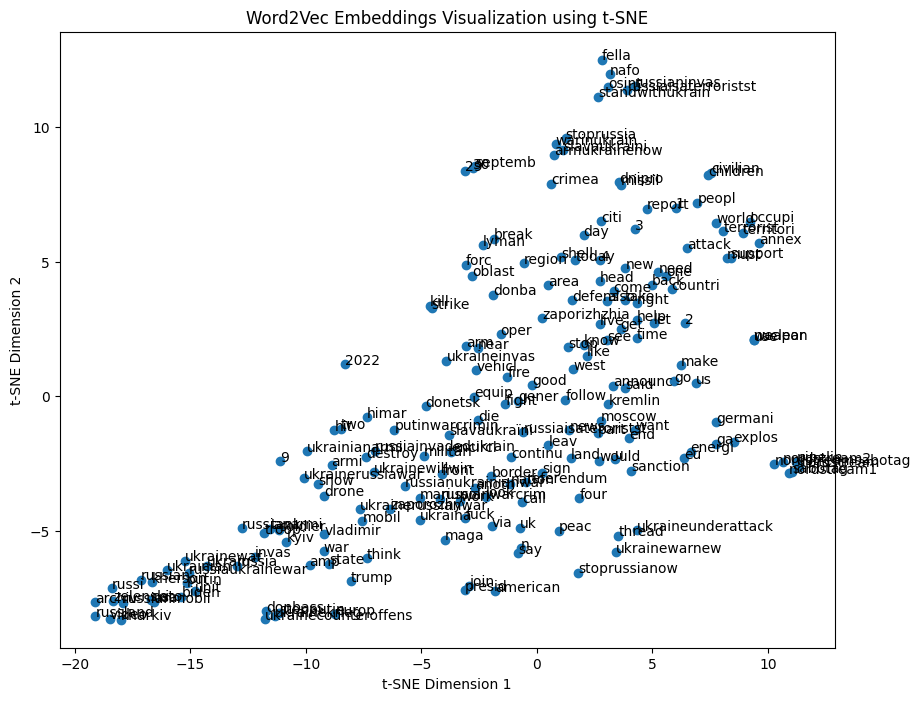

In [ ]:
model = Word2Vec(text_processed, workers=4, vector_size=100, min_count=50, window=10)

X = model.wv[model.wv.index_to_key]

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming X contains your Word2Vec word embeddings
# Perform t-SNE to reduce the dimensions to 2 for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])

words = model.wv.index_to_key
for i, word in enumerate(words):
    plt.annotate(word, xy=(tsne_result[i, 0], tsne_result[i, 1]))

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Word2Vec Embeddings Visualization using t-SNE')
plt.show()
